In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#wczytaj plik 'heart.csv'
df = pd.read_csv('heart.csv')

In [3]:
#wyswietl wszystkie dane
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#sprawdz czy zbior jest równoliczny. najłatwiejszym sposobem jest zsumowanie wartości w ostatniej kolumnie
df['output'].sum()
#ale chyba nie tak, bardziej to na dole XD

165

In [5]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [6]:
data = np.asarray(df)

X = data[:,:-1]
y =  data[:,-1]

w SVM-ie ważne jest poszukanie marginesów (u nas wlaśnie to c jest marginesem; liczba odpowiadająca za ten współczynnik)

In [7]:
def clasification(X,y, kernel, train_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size, random_state=42)
    model = SVC(kernel = kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [8]:
results = []
kernels = ['linear', 'poly', 'rbf']
train_set_sizes = [0.2, 0.4, 0.6, 0.8]
for kernel in kernels:
    small_list = []
    for size in train_set_sizes:
        small_list.append(clasification(X,y, kernel, size))
        print(small_list[-1])
    results.append(small_list)
            

0.757201646090535
0.8296703296703297
0.8524590163934426
0.8688524590163934
0.6378600823045267
0.6868131868131868
0.7295081967213115
0.7704918032786885
0.6419753086419753
0.6648351648351648
0.7213114754098361
0.7049180327868853


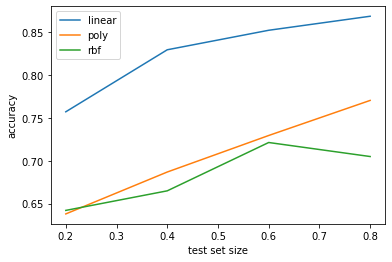

In [9]:
import matplotlib.pyplot as plt

for i in range(len(kernels)):
    plt.plot(train_set_sizes, results[i],label=kernels[i])
    plt.xlabel("test set size")
    plt.ylabel("accuracy")
plt.legend()

In [10]:
def clasification(X,y, c_value):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state=42) #zmienić random_state
    model = SVC(kernel = "linear", C = c_value)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [11]:
results = []
c_values = [0.001, 0.01,  0.1, 1, 10]#tutaj umieść listę wartości do sprawdzenia
for c in c_values:
    results.append(clasification(X,y, c))
    print(results[-1])

0.819672131147541
0.8524590163934426
0.8852459016393442
0.8688524590163934
0.8852459016393442


widzimy, że im większa wartość marginesu, tym lepiej on sobie radzi 

n_degree - dla kernela wielomianowego, odpowiada za stopień wielomianu (liczba brzuszków wykresu; wartośc najwyższej potęgi)

In [12]:
def clasification(X,y, c_value, n_degree):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state=42) #zmienić random_state
    model = SVC(kernel = "poly", degree=n_degree, C=c_value)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [14]:
results = []
n_degree = [2, 3, 4, 5]#tutaj umieść listę wartości do sprawdzenia
c_values = [0.001, 0.01, 0.1, 1, 10]#tutaj umieść listę wartości do sprawdzenia
for degree in n_degree:
    small_list = []
    for c_value in c_values:
        small_list.append(clasification(X,y, c_value, degree))
        print(small_list[-1])
    results.append(small_list)

0.5245901639344263
0.5245901639344263
0.5245901639344263
0.7049180327868853
0.7704918032786885
0.5245901639344263
0.5245901639344263
0.5245901639344263
0.7704918032786885
0.819672131147541
0.5245901639344263
0.5245901639344263
0.5901639344262295
0.7704918032786885
0.819672131147541
0.5245901639344263
0.5245901639344263
0.6557377049180327
0.7704918032786885
0.819672131147541


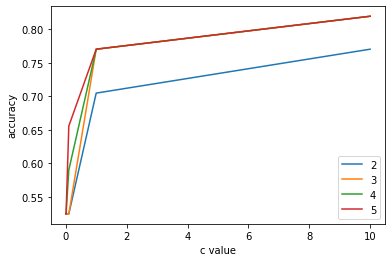

In [15]:
for i in range(len(n_degree)):
    plt.plot(c_values, results[i],label=n_degree[i])
    plt.xlabel("c value")
    plt.ylabel("accuracy")
    #plt.xscale("log")
plt.legend()

anyway, nic się nie poprawiło, więc tak czy inaczej najlepiej jest użyć kernel liniowy, ale warto pobawić się wartością c, żeby trochę podbić skuteczność 